## Regression

One of the most popular python modules used for regression modelling is __statsmodels__. Details of the __statsmodels__ library can be found [here](https://www.statsmodels.org/stable/index.html). The module also includes 
submodules for statistical tests and data exploration, but the focus of this section is the use of __linear models__ and __generlised linear models__. 


### Getting started

The __statsmodels__ module has been designed to work well with both the __numpy__ and __pandas__ modules, but it can be used without these if required. However, this section focusses on using __statsmodels__ in conjunction with __pandas__.

#### load and explore the pollution data set

In [21]:
import pandas as pd

In [37]:
pollute = pd.read_csv("Pollute.txt",delimiter="\t")

#### explore the data

In [38]:
pollute.head()

,Pollution,Temp,Industry,Population,Wind,Rain,Wet days
0,24,61.5,368,497,9.1,48.34,115
1,30,55.6,291,593,8.3,43.11,123
2,56,55.9,775,622,9.5,35.89,105
3,28,51.0,137,176,8.7,15.17,89
4,14,68.4,136,529,8.8,54.47,116


In [39]:
pollute.describe()

,Pollution,Temp,Industry,Population,Wind,Rain,Wet days
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,30.048780,55.763415,462.365854,608.609756,9.446341,36.771220,113.902439
std,23.472272,7.227716,563.179357,579.113023,1.423569,11.771964,26.506419
min,8.000000,43.500000,35.000000,71.000000,6.000000,7.050000,36.000000
25%,13.000000,50.600000,181.000000,299.000000,8.700000,30.960000,103.000000
50%,26.000000,54.600000,347.000000,515.000000,9.300000,38.740000,115.000000
75%,35.000000,59.300000,462.000000,717.000000,10.600000,43.110000,128.000000
max,110.000000,75.500000,3344.000000,3369.000000,12.700000,59.800000,166.000000


In [40]:
pollute.corr()

,Pollution,Temp,Industry,Population,Wind,Rain,Wet days
Pollution,1.000000,-0.433600,0.645165,0.493780,0.095099,0.054284,0.369564
Temp,-0.433600,1.000000,-0.187882,-0.062678,-0.351123,0.386280,-0.430242
Industry,0.645165,-0.187882,1.000000,0.955458,0.236506,-0.031217,0.130738
Population,0.493780,-0.062678,0.955458,1.000000,0.211772,-0.026069,0.042083
Wind,0.095099,-0.351123,0.236506,0.211772,1.000000,-0.012466,0.166950
Rain,0.054284,0.386280,-0.031217,-0.026069,-0.012466,1.000000,0.496058
Wet days,0.369564,-0.430242,0.130738,0.042083,0.166950,0.496058,1.000000


#### use seaborn to visulaise the data

In [26]:
import seaborn

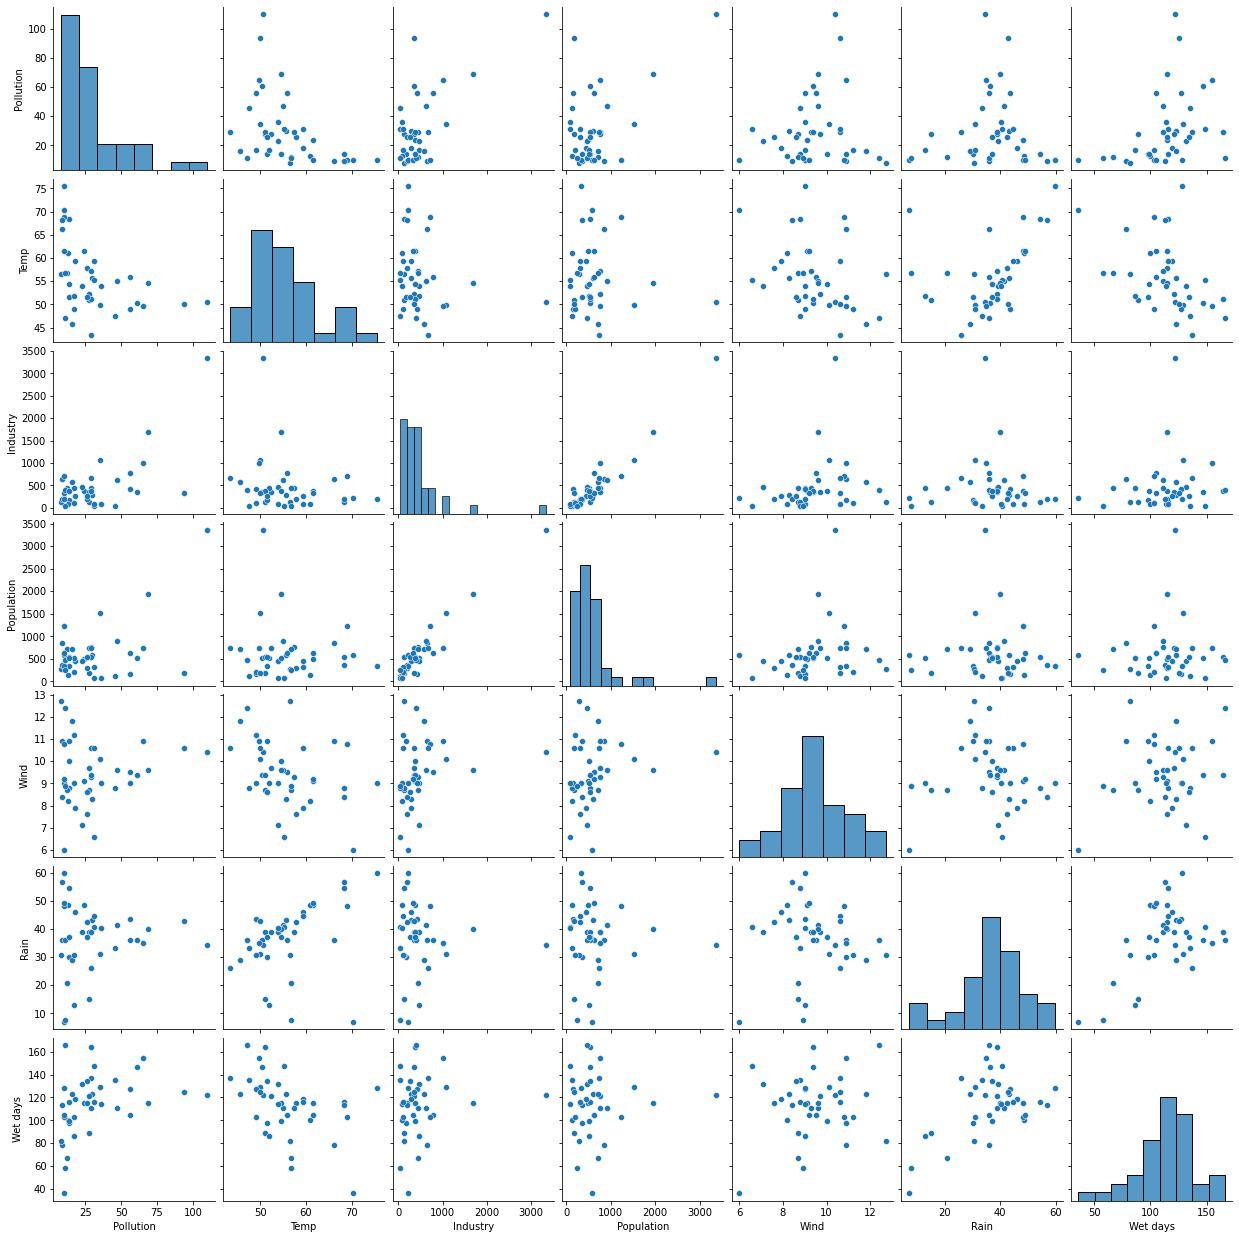

In [41]:
seaborn.pairplot(pollute)

<AxesSubplot:>

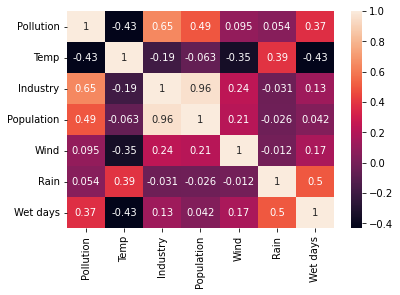

In [42]:
seaborn.heatmap(pollute.corr(), annot=True)

## Exercise 1

Explore the [__pandas__](https://pandas.pydata.org/) and [__seaborn__](https://seaborn.pydata.org/) websites and look for further ways of usefully exploring the _pollute_ data set.

## Use __statmodels__ to create a regression model

In [30]:
import statsmodels

The __statsmodels__ module provides a facility to specify regression models using a model formula.

In [31]:
import statsmodels.formula.api as smf

### Ordinary least squares regression

In [ ]:
This example looks at regressing population against industry. When using __statsmodels__, a model is created first.

In [54]:
pollute_model = smf.ols('Population ~ Industry', data=pollute)

First note the way in which the model is specfied using the string 'Population ~ Industry'. Secondly, the model uses the formula to create various things, such as the design matrix, but does not actually fit the model. To see what information the model does contain the python __dir__ function can be used.

In [55]:
dir(pollute_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_data_attr',
 '_df_model',
 '_df_resid',
 '_fit_collinear',
 '_fit_ridge',
 '_fit_zeros',
 '_formula_max_endog',
 '_get_init_kwds',
 '_handle_data',
 '_init_keys',
 '_kwargs_allowed',
 '_setup_score_hess',
 '_sqrt_lasso',
 'data',
 'df_model',
 'df_resid',
 'endog',
 'endog_names',
 'exog',
 'exog_names',
 'fit',
 'fit_regularized',
 'formula',
 'from_formula',
 'get_distribution',
 'hessian',
 'hessian_factor',
 'information',
 'initialize',
 'k_constant',
 'loglike',
 'nobs',
 'predict',
 'rank',
 'score',
 'weights',
 'wendog',
 'wexog',
 'whiten']

For instance, the __nobs__ attribute contains the number of observations

In [57]:
pollute_model.nobs

41.0

As might be expected, some of the attributes are methods

In [59]:
help(pollute_model.loglike)

Help on method loglike in module statsmodels.regression.linear_model:

loglike(params, scale=None) method of statsmodels.regression.linear_model.OLS instance
    The likelihood function for the OLS model.
    
    Parameters
    ----------
    params : array_like
        The coefficients with which to estimate the log-likelihood.
    scale : float or None
        If None, return the profile (concentrated) log likelihood
        (profiled over the scale parameter), else return the
        log-likelihood using the given scale value.
    
    Returns
    -------
    float
        The likelihood function evaluated at params.



Because the variable  _pollute_model_ is a __statsmodels__ _ols_ object, you can get information on how to use it using the __help__ function.

In [62]:
help(pollute_model)

Help on OLS in module statsmodels.regression.linear_model object:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result 

One of the methods, __fit__, fits the model to the data.

In [63]:
pollute_fit = pollute_model.fit()

Note that the object returned by __fit__ is a new type which has its own methods. 

## Exercise - X

List the methods and attributes associated with the _pollute_fit_ variable.

In [78]:
dir(pollute_fit)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [80]:
pollute_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     408.8
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           2.84e-22
Time:                        12:42:10   Log-Likelihood:                -268.46
No. Observations:                  41   AIC:                             540.9
Df Residuals:                      39   BIC:                             544.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    154.3400     35.151      4.391      0.000      83.241     225.439
Industry       0.9825      0.049     20.218      0.000       0.884       1.081
==============================================================================
Omnibus:                        1.358   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                0.658
Skew:                          -0.281   Prob(JB):                        0.720
Kurtosis:                       3.264   Cond. No.                         941.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Values can be extracted fom the _pollute_fit_ object, for example, the log likeihood.

In [83]:
pollute_fit.llf

-268.4575091479029

In [86]:
pollute_fit.cov_HC1

array([[ 7.22783024e+02, -2.82788320e-01],
       [-2.82788320e-01,  1.26041526e-03]])

In [84]:
help(pollute_fit)

Help on RegressionResultsWrapper in module statsmodels.regression.linear_model:

<statsmodels.regression.linear_model.RegressionResultsWrapper object>
    Results class for for an OLS model.
    
    Parameters
    ----------
    model : RegressionModel
        The regression model instance.
    params : ndarray
        The estimated parameters.
    normalized_cov_params : ndarray
        The normalized covariance parameters.
    scale : float
        The estimated scale of the residuals.
    cov_type : str
        The covariance estimator used in the results.
    cov_kwds : dict
        Additional keywords used in the covariance specification.
    use_t : bool
        Flag indicating to use the Student's t in inference.
    **kwargs
        Additional keyword arguments used to initialize the results.
    
    See Also
    --------
    RegressionResults
        Results store for WLS and GLW models.
    
    Notes
    -----
    Most of the methods and attributes are inherited from Regre

In [75]:
help(dir)

Help on built-in function dir in module builtins:

dir(...)
    dir([object]) -> list of strings
    
    If called without an argument, return the names in the current scope.
    Else, return an alphabetized list of names comprising (some of) the attributes
    of the given object, and of attributes reachable from it.
    If the object supplies a method named __dir__, it will be used; otherwise
    the default dir() logic is used and returns:
      for a module object: the module's attributes.
      for a class object:  its attributes, and recursively the attributes
        of its bases.
      for any other object: its attributes, its class's attributes, and
        recursively the attributes of its class's base classes.



In [20]:
pollute_fit.bic

544.3421624292145

In [89]:
import statsmodels.api as sm

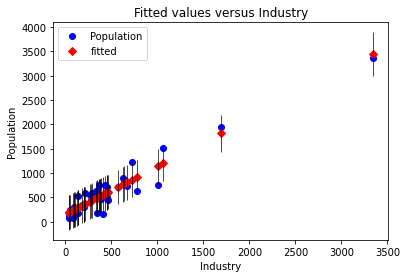

In [93]:
fig = sm.graphics.plot_fit(pollute_fit,"Industry")

In [36]:
statsmodels.api.graphics.plot_regress_exog(model)

AttributeError: module 'statsmodels' has no attribute 'api'

In [39]:
import statsmodels.api as sm

eval_env: 1


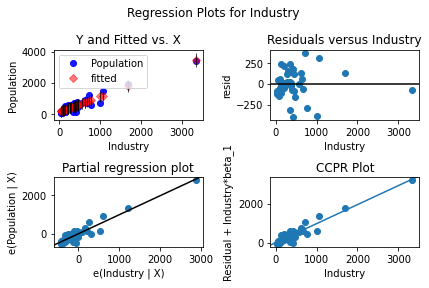

In [47]:
sm.graphics.plot_regress_exog(model, "Industry").tight_layout(pad=1.0)

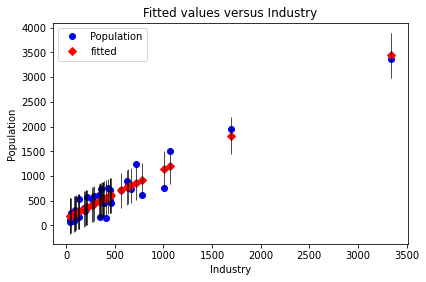

In [50]:
sm.graphics.plot_fit(model,"Industry").tight_layout(pad=1.0)



In [2]:
sm.qqplot(model.resid)

NameError: name 'sm' is not defined

### references

[statsmodels](https://www.statsmodels.org/stable/index.html)

[seaborn](https://seaborn.pydata.org/)

[pandas](https://pandas.pydata.org/)

In [1]:
dir(model)

NameError: name 'model' is not defined